# Step 1 : Downaload the dataset and Unzip into two directories

In [1]:
!wget https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip

--2020-10-24 05:21:36--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘cell_images.zip’

cell_images.zip     100%[===================>] 337.08M  99.1MB/s    in 3.5s    

2020-10-24 05:21:39 (97.1 MB/s) - ‘cell_images.zip’ saved [353452851/353452851]



In [ ]:
!unzip cell_images.zip

In [3]:
!apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (150 kB/s)
Selecting previously unselected package tree.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [4]:
# Show directory structure
!tree --dirsfirst --filelimit 10 /content/cell_images/

/content/cell_images/
├── Parasitized [13780 entries exceeds filelimit, not opening dir]
└── Uninfected [13780 entries exceeds filelimit, not opening dir]

2 directories, 0 files


In [5]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 6.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=51b5f5e9e8d75f6149734d8f3b54c0ed1b2817b33c9a7bebc378f68ee83dc9f2
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=58510a50733baad2088b0008b8465227235906f42710845c9b335e220d24dde7
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [21]:
#ensorflow and Keras Utils 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

# Numpy for Matrix Manipulatons 
import numpy as np

# Matplotlib and Seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

# Sklearn for Model Utils
from sklearn.model_selection import train_test_split
print('Tensorflow Version:',tf.__version__)

Tensorflow Version: 2.3.0


# Step 2 : Data Preprocessing

In [10]:
data_directory = '/content/cell_images'
image_width = 64
image_height = 64
m = 27558

# Data Augmentation
datagen = ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,rescale=1/255.0)  

In [11]:
train_data_generator = datagen.flow_from_directory(directory='/content/cell_images', target_size=(image_width,image_height),
                                                   class_mode = 'binary', batch_size = m, shuffle=True, subset='training'
                            

# We use Data Generator to create a tensor dataset of all images form the given directories

Found 27558 images belonging to 2 classes.


In [12]:
X = train_data_generator[0][0]
Y = train_data_generator[0][1]

#  Here we separate the X and Y directories
print(X.shape)
print(Y.shape)

(27558, 64, 64, 3)
(27558,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
 
# We perform a 80/20 Train test Split of the Dataset

In [18]:
print(X_train.shape, y_train.shape) 
# use this data set for 80% training + 20% validation

print(X_test.shape,y_test.shape) 
# use this data for testing final score

(22046, 64, 64, 3) (22046,)
(5512, 64, 64, 3) (5512,)


# Step 3 : Building the Model

In [64]:
def build_model(X_train, y_train, X_val, y_val,epochs): 

    # Inspired from LENET 5 Architecture
    
    model = Sequential()

    model.add(Conv2D(6, (5,5), activation = 'relu', input_shape = X_train.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.2))

    model.add(Conv2D(10, (5,5), activation = 'relu'))
    model.add(MaxPooling2D((2,2),strides=(1,1)))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.2))

    model.add(Conv2D(16, (5,5), activation = 'relu'))
    model.add(MaxPooling2D((2,2),strides=(1,1)))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(120, activation = 'relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))

    model.add(Dense(84, activation = 'relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation = 'relu'))
    model.add(BatchNormalization(axis = -1))

    model.add(Dense(1, activation = 'sigmoid'))

    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
                                initial_learning_rate=2e-3,
                                decay_steps=10000,
                                decay_rate=0.9)

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              loss="binary_crossentropy",
              metrics=["accuracy"])

    model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data = (X_val, y_val))

    return model

# Step 4 : Training the Model

In [65]:
results = build_model(X_train, y_train,X_test, y_test, 40)

Epoch 1/40
173/173 [==============================] - 2s 14ms/step - loss: 0.5167 - accuracy: 0.7497 - val_loss: 2.1308 - val_accuracy: 0.5022
Epoch 2/40
173/173 [==============================] - 2s 12ms/step - loss: 0.2348 - accuracy: 0.9182 - val_loss: 1.5107 - val_accuracy: 0.6029
Epoch 3/40
173/173 [==============================] - 2s 12ms/step - loss: 0.1973 - accuracy: 0.9355 - val_loss: 0.1986 - val_accuracy: 0.9336
Epoch 4/40
173/173 [==============================] - 2s 12ms/step - loss: 0.1778 - accuracy: 0.9438 - val_loss: 0.1697 - val_accuracy: 0.9452
Epoch 5/40
173/173 [==============================] - 2s 12ms/step - loss: 0.1751 - accuracy: 0.9460 - val_loss: 0.1649 - val_accuracy: 0.9458
Epoch 6/40
173/173 [==============================] - 2s 12ms/step - loss: 0.1599 - accuracy: 0.9494 - val_loss: 0.1742 - val_accuracy: 0.9436
Epoch 7/40
173/173 [==============================] - 2s 12ms/step - loss: 0.1627 - accuracy: 0.9482 - val_loss: 0.1823 - val_accuracy: 0.9421

# Step 5 : Checking Model Accuracy and Entropy Loss

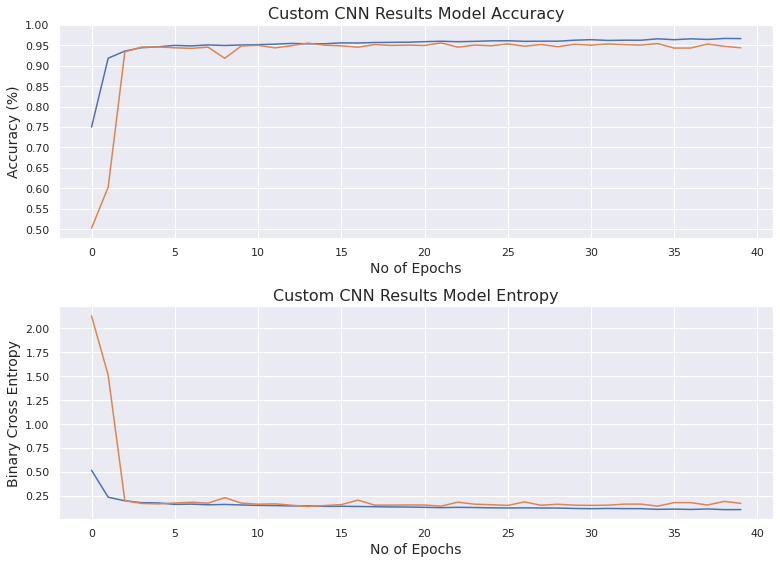

In [66]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize= (11,8))
#epochs = n_epochs
axes[0].plot(results.history.history['accuracy'],label='Training Accuracy')
axes[0].plot(results.history.history['val_accuracy'],label='Vaidation Accuracy')
axes[0].set_xlabel('No of Epochs',fontsize=14)
axes[0].set_ylabel('Accuracy (%)',fontsize=14)
axes[0].set_yticks(np.arange(0.5,1.01,0.05))
axes[0].set_title('Custom CNN Results Model Accuracy',fontsize=16)

axes[1].plot(results.history.history['loss'],label='Training loss')
axes[1].plot(results.history.history['val_loss'],label='Validation loss')
axes[1].set_xlabel('No of Epochs',fontsize=14)
axes[1].set_ylabel('Binary Cross Entropy',fontsize=14)
axes[1].set_title('Custom CNN Results Model Entropy',fontsize=16)
#axes[1].set_yticks(np.arange(0.0,0.9,0.1))


plt.tight_layout()
plt.show()

In [67]:
results.save('/content/drive/My Drive/DS-Python-notebooks/My-Projects/Malaria/custom_cnn_lenet_val_9539_oct_24_1100.h5')